# Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Dataset

In [2]:
data_df=pd.read_csv('Iris.csv')

In [3]:
data_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_df.shape

(150, 6)

In [5]:
data_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data_df.duplicated().sum()

0

In [9]:
data=data_df.drop('Species',axis=1)

# Finding the optimal no. of cluster using eblow method

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


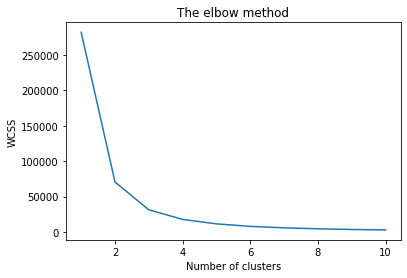

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Using Elbow method , 3 is the optimal no of Cluster for given dataset

# Fitting the dataset in K-means Algorthims

In [11]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
k_means.fit(data)
labels = k_means.labels_

In [12]:
data_df['clus_labels']=labels

In [13]:
data_df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clus_labels
140,141,6.7,3.1,5.6,2.4,Iris-virginica,1
141,142,6.9,3.1,5.1,2.3,Iris-virginica,1
142,143,5.8,2.7,5.1,1.9,Iris-virginica,1
143,144,6.8,3.2,5.9,2.3,Iris-virginica,1
144,145,6.7,3.3,5.7,2.5,Iris-virginica,1
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1
149,150,5.9,3.0,5.1,1.8,Iris-virginica,1


In [15]:
print(data_df.clus_labels,data_df.Species)

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: clus_labels, Length: 150, dtype: int32 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [16]:
# label 0 = Iris-setosa
# label 1 = Iris-virginica
# Label 2 = Iris-versicolour

# Taking the respective rows of cluster using for loop

In [17]:
lablel0 = []
lablel1 = []
lablel2 = []

for r in range(0,len(data_df['Id'])):
    if (data_df['clus_labels'].iloc[r]==0):
        lablel0.append(data_df['Id'].iloc[r])
     
    if (data_df['clus_labels'].iloc[r]==1):
        lablel1.append(data_df['Id'].iloc[r])
    
    if (data_df['clus_labels'].iloc[r]==2):
        lablel2.append(data_df['Id'].iloc[r])
    
   

    


# Scatter plot to visualise the cluster using two columns

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


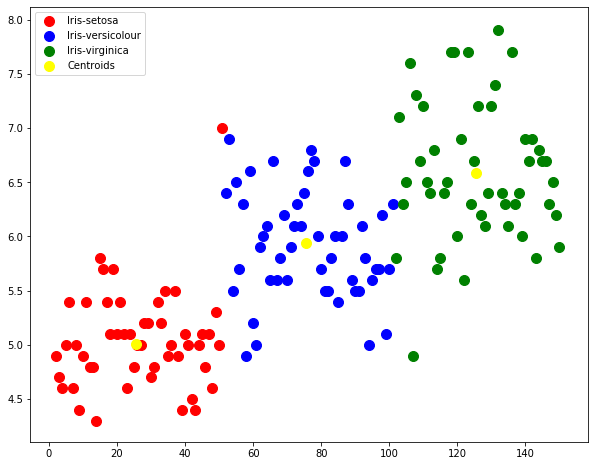

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

plt.scatter( data_df.Id[lablel0],data_df.SepalLengthCm[lablel0], s=100,c = 'red', label = 'Iris-setosa')
plt.scatter( data_df.Id[lablel2],data_df.SepalLengthCm[lablel2],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter( data_df.Id[lablel1],data_df.SepalLengthCm[lablel1],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')


plt.legend()